In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

## 請安裝
> pip install opencv-python

# Problem : K-Means Clustering
**K-Means Clustering** is an unsupervised learning algorithm for data grouping. In image segmen- tation, it can be applied to partition image pixels into different groups based on the associated pixel values or features. In this problem, you will learn how to segment the provided image by using K-means clustering.

In [3]:
img = cv2.imread('data/bird.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## 1-1. cluster with only RGB values

In [6]:
def km_clust(array, n_clusters):   
    # Define the k-means clustering problem
    k_m = KMeans(n_clusters = n_clusters)
    # Solve the k-means clustering problem
    k_m.fit(array)
    # Get the coordinates of the clusters centres
    center = k_m.cluster_centers_
    print(center)
    # Get the label of each point
    label = k_m.labels_
    return(label, center)

[[163.22644728 197.72642953 120.58504444]
 [107.70648253  95.57639636  71.60704611]]
[[ 58.41546759  55.23087219  46.15571915]
 [160.65618024 204.75998503 114.7158998 ]
 [184.00444791 182.80826475 165.00929499]
 [143.9696992  128.33940942  97.2580989 ]]


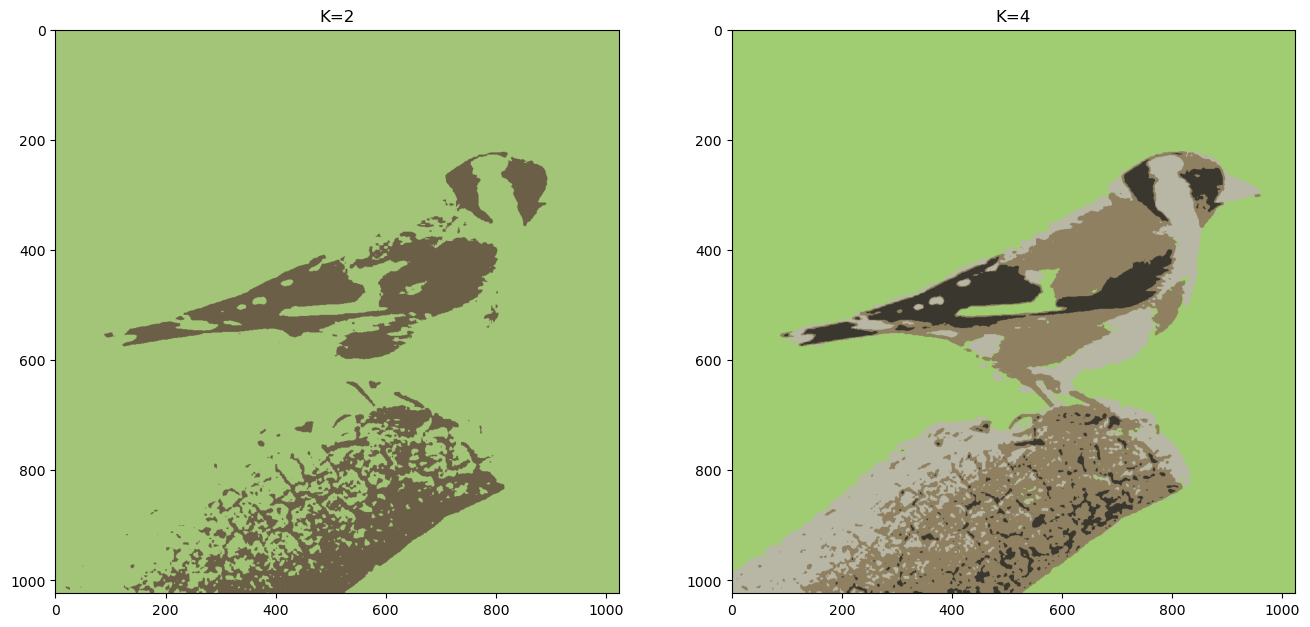

In [16]:
h, w, c = img.shape
#print(img.shape)
Z = img.reshape((-1, 3))
Ka = [2, 4]
plt.figure(figsize=(16,12))

for i,K in enumerate(Ka):
    label, center = km_clust(Z, K)
    #Now convert back into uint8, and make original image
    center = np.uint8(center[:,:3])
    res = center[label.flatten()]
    res = res.reshape(img.shape)
    plt.subplot(1, len(Ka), i+1)
    plt.title('K={}'.format(K))
    plt.imshow(res)
    
plt.show()

## 1-2. cluster with RGB values and the location

[[154.40755844 186.40113495 117.02019303 512.738799   255.1431562 ]
 [156.48438277 180.43528072 110.43440077 510.26469776 767.13322502]]


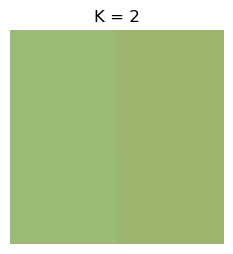

In [17]:
h, w, c = img.shape

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h], [w]])
Z = Z.reshape(-1, 5)

Ks = [2]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()

## 1-3. explain the differences between the two methods under the same K.
![](images/7.4_result.PNG)

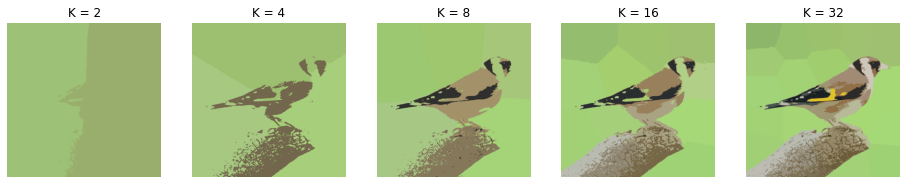

[[152.88519766 174.08929131 108.01616749 133.91006123 187.2486317 ]
 [158.3313002  193.90916149 120.145415   121.08239683  61.04858299]]
[[157.91938335 192.79034362 112.34845131  45.85538654 124.39422805]
 [113.99215847 101.88276311  75.83760797 173.13301042 137.939388  ]
 [166.10280681 199.67688367 129.65677163 168.08600564  51.51106574]
 [167.56602887 206.0956128  123.00971946 169.24788529 211.82359046]]


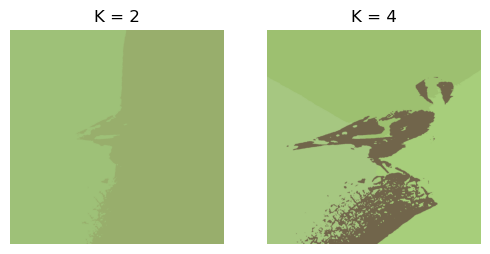

In [18]:
h, w, c = img.shape

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h/4], [w/4]])
Z = Z.reshape(-1, 5)

Ks = [2, 4]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()